(sec-machine-learning-intro)=
# 机器学习

机器学习指让计算机学习已有数据中的统计规律，并用来预测未知数据。机器学习项目总共分两个阶段：训练（Training）和推理（Inference）。计算机学习已有数据的过程被称为训练阶段，预测未知数据的过程被称为推理阶段。

## 机器学习的定义

:::{note}
本书的公式中，变量加粗表示该变量为向量或矩阵。
:::

给定数据集 $D = \lbrace(\boldsymbol{x}_{1}, y_{1}), (\boldsymbol{x}_{2}, y_{2}), ... , (\boldsymbol{x}_{m}, y_{m}) \rbrace$ ，数据集中有 $m$ 个数据对。第 $i$ 条数据为 $(\boldsymbol{x}_{i}, y_{i})$ ，这条数据被称为一组训练样本（Training Example）。在 {numref}`sec-data-science-lifecycle` 的房价例子中，$\boldsymbol{x_{i}}$ 是一个向量，向量中的每个元素是数据科学家构建的特征，比如街区收入、房屋年龄、房间数、卧室数、街区人口等。我们可以基于这些数据，使用某种机器学习模型对其进行建模，学习到数据中的规律，得到一个模型，其中某个给定的数据集 $D$ 为样本（Sample），又被称为训练集（Training Set），$\boldsymbol{x}$ 为特征（Feature），$y$ 为真实值（Label）或者目标值（Target）。

## 线性回归

### 一元线性回归

我们从线性回归开始，了解机器学习模型的数学原理。中学时，我们使用 $ y = ax + b $ 对很多问题进行建模，方程描述了变量 $y$ 随着变量 $x$ 而变化。方程是一条直线。如果建立好这样的数学模型，已知 $x$ 我们就可以得到预测的 $\hat{y}$ 了。统计学家给变量 $y$ 带上了一个小帽子，表示这是预测值，以区别于真实观测到的数据。方程只有一个自变量 $x$，且不含平方立方等非一次项，因此被称为**一元线性方程**。

在对数据集进行建模时，我们从最简单的开始，只关注房屋面积（$x$）和房价（$y$）两个维度的数据。我们可以对参数 $a$ 和 $b$ 取不同值来构建不同的直线，这样就形成了一个参数家族。参数家族中有一个最佳组合，可以在统计上以最优的方式描述数据集。那么一元线性回归的监督学习过程就可以被定义为：给定 $m$ 个数据对 $(x, y)$ ，寻找最佳参数 $a^*$ 和 $b^*$，使模型可以更好地拟合这些数据。$a$ 和 $b$ 可以取不同的参数，到底哪个参数组合是最佳的呢？如何衡量模型是否以最优的方式拟合数据呢？机器学习用损失函数（Loss Function）的来衡量这个问题。损失函数又称为代价函数（Cost Function），它计算了模型预测值 $\hat{y}$ 和真实值 $y$ 之间的差异程度。从名字也可以看出，这个函数计算的是模型犯错的损失或代价，损失函数越大，模型越差，越不能拟合数据。统计学家通常使用 $L(\hat{y}, y)$ 来表示损失函数。

对于线性回归，一个简单实用的损失函数为预测值与真实值误差平方的平均值，下面公式中，$i$ 表示数据集中的第 $i$ 个样本点：

$$
L(\hat{y}, y) = \frac{1}{m} \sum_{i=1}^m(\hat{y}_{i}- y_{i})^2
$$

在其基础上代入公式 $\hat{y}=ax + b$，得到：

$$
L(\hat{y}, y) =\frac{1}{m} \sum_{i=1}^m[(ax_{i} + b) - y_{i}]^2
$$

对于给定数据集，$x$ 和 $y$ 的值是已知的，参数 $a$ 和 $b$ 是要求解的，模型求解的过程就是解下面公式的过程：

$$
a^*, b^* = \mathop{\arg\min}_{a, b}L(a, b)
$$

式中 $\arg\min$ 是一种常见的数学符号，表示寻找能让 $L$ 函数最小的参数 $a^*$ 和 $b^*$。

$$
a^*, b^* = \mathop{\arg\min}_{a, b}\frac{1}{m}\sum_{i=1}^m[(ax_{i} + b) - y_{i}]^2
$$


求解这个函数一般有两个方法：

* 基于微积分和线性代数知识，求使得 $L$ 导数为 0 的点，这个点一般为最优点。这种方式只能解那些简单的模型。
* 基于梯度下降，迭代地搜索最优点。梯度下降法能解很多复杂的模型，比如深度学习模型，{numref}`sec-deep-learning-intro` 进一步解释了梯度下降法。

### 线性回归的一般形式

我们现在把回归问题扩展到更为一般的场景。假设 $\boldsymbol{x}$ 是多元的，或者说是多维的。比如，要预测房价，需要考虑的因素很多，包括学区、卧室数量（两居、三居、四居）、周边商业、交通等。如下面公式所示，每个因素是一个 $W$：

$$
f(\boldsymbol{x}) = b + W_1 \times x_1 + W_2 \times x_2 + ... + W_n \times x_n
$$

$W$ 是 **参数**（Parameter），也可以叫做 **权重**（Weight）。这里共有 $n$ 种维度的影响因素，机器学习领域将这 $n$ 种影响因素称为**特征**（Feature）。用向量表示为：

$$
f(\boldsymbol{x}) = b + \boldsymbol{W} \boldsymbol{{x}}
$$

要预测的 $y$ 是实数，从负无穷到正无穷，预测实数的模型被称为**回归模型**。

## 逻辑回归

回归问题是指目标值为整个实数域，分类问题是指目标值为有限的离散值。比如，我们想进行一个情感分类，目标值有 0 和 1 两个选项，表示负向和正向，一个二分类函数可以表示为：

$$
y = 
\begin{cases}
   0 &\text{if } z < 0 \\
   1 &\text{if } z \geq 0
\end{cases}
$$

在线性回归的基础上，在其外层套上一个函数 $g(z)$：

$$
g(z)= \frac 1 {1+e^{-z}}
$$

这个 $g(z)$ 被称为 Sigmoid 函数或 Logistic 函数，下面对 Sigmod 函数进行了可视化。

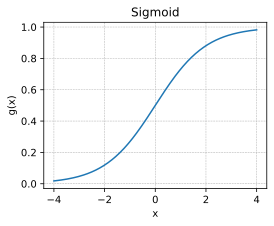

<Figure size 640x480 with 0 Axes>

In [7]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(4, 3), sharey=True)

# 创建 x 轴的数据
x = np.linspace(-4, 4, 200)

# 创建 sigmoid 函数的 y 轴数据
sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid, label='Sigmoid function')
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Logistic 函数的性质决定了它可以将 $(-\infty, +\infty)$ 映射到 $(0, 1)$ 上， Logistic 函数有明确的分界线，在中心点处取值为 0.5，因为 Logistic 函数有明确的分界线，可以用来进行分类。我们将线性回归套入 Logistic 函数，可以得到：

$$
y = f(\boldsymbol{x}) = g(\boldsymbol{W} \boldsymbol{x}) = \frac 1{1+e^{-\boldsymbol{W} \boldsymbol{x}}}
$$

这里不再赘述 Logistic 回归的训练求解数学推导，感兴趣的读者可以在互联网上搜索相关知识。